In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
img_filename = 'OR_IM.png'
save_filename = 'HE_IM.png'

#load file as pillow Image 
img = Image.open(img_filename)

# convert to grayscale
imgray = img.convert(mode='L')

#convert to NumPy array
img_array = np.asarray(imgray)

In [4]:
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#cumulative histogram
chistogram_array = np.cumsum(histogram_array)

In [5]:
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

In [6]:

# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)

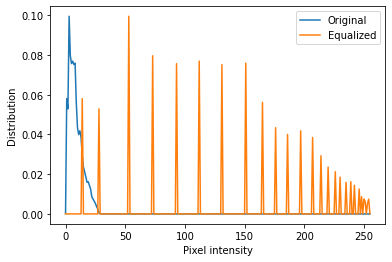

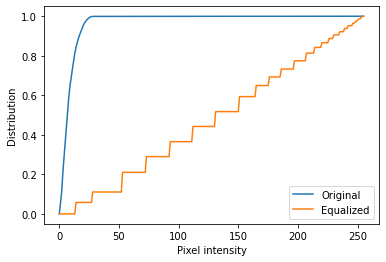

In [7]:
# Let's plot the histograms

#histogram and cumulative histogram of original image has been calculated above
ori_cdf = chistogram_array
ori_pdf = histogram_array

#calculate histogram and cumulative histogram of equalized image
eq_histogram_array = np.bincount(eq_img_array.flatten(), minlength=256)
num_pixels = np.sum(eq_histogram_array)
eq_pdf = eq_histogram_array/num_pixels
eq_cdf = np.cumsum(eq_pdf)

#plot
plt.figure()
plt.plot(ori_pdf)
plt.plot(eq_pdf)
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')
plt.legend(['Original','Equalized'])
plt.figure()
plt.plot(ori_cdf)
plt.plot(eq_cdf)
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')
plt.legend(['Original','Equalized'])

In [9]:

eq_img = Image.fromarray(eq_img_array, mode='L')
eq_img.save(save_filename)